# Indian actor classificaiton model

In [198]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from keras import layers
from keras.models import Sequential
import pathlib
from IPython.display import display

## Variables that control the model settings and image dimensions

In [199]:
# Initial model variables
verbose = True
batch_size = 32
img_height = 28
img_width = 28

75000


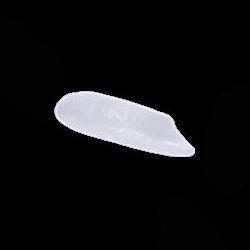

In [200]:
# Import data
dataset_dir =  pathlib.Path("Rice_Image_Dataset")

# Image count
if(verbose):
    image_count = len(list(dataset_dir.glob('*/*.jpg')))
    print(image_count)
    test_images = list(dataset_dir.glob('Jasmine/*'))
    display(PIL.Image.open(str(test_images[1])))

## Intialising training and validtion datasets

In [201]:
train_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=8,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

val_ds = keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=8,
    image_size = (img_height,img_width),
    batch_size=batch_size
)

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Found 75000 files belonging to 5 classes.
Using 15000 files for validation.


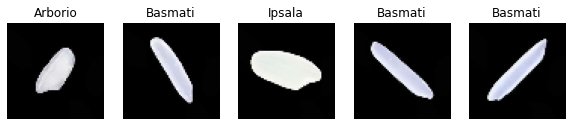

In [202]:
# Class names/labels for images
class_names = train_ds.class_names 

if(verbose):

  # First batch data
  plt.figure(figsize=(10, 10))
  for images, labels in train_ds.take(1):
    for i in range(5):
      ax = plt.subplot(1, 5, i + 1)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[labels[i]])
      plt.axis("off")


### Helps get acesses to repeated spots in memory

In [203]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

## Creating Convolution layers

First layer involves rescaling input data. This is better than doing it over the whole data as it involves less preparation to be put into the network.

In [204]:
num_classes = len(class_names)

In [205]:
# Augumentation function (Helps with overfitting)
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal",
    input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
])

In [206]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(8, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.Dropout(0.2),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, name="outputs")
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [207]:
epochs = 2
results = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/2
1477/1875 [======================>.......] - ETA: 34s - loss: 0.1897 - accuracy: 0.9326

KeyboardInterrupt: 

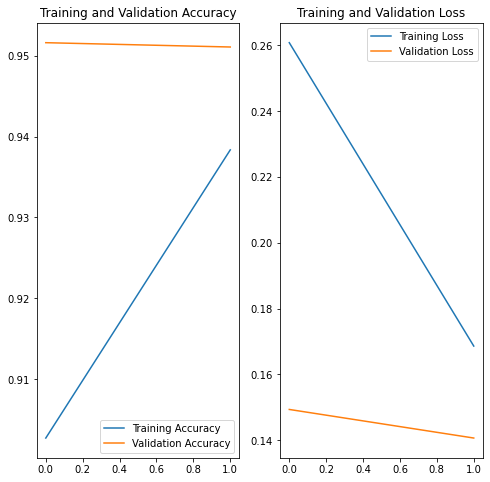

In [ ]:

acc = results.history['accuracy']
val_acc = results.history['val_accuracy']

loss = results.history['loss']
val_loss = results.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()